Name- Vikash Kumar

Position- Datascience intern at Codsoft

Task no. 1- Titanic Survival prediction Rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df= pd.read_csv(r"C:\Users\NIET\Downloads\archive (7)\tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


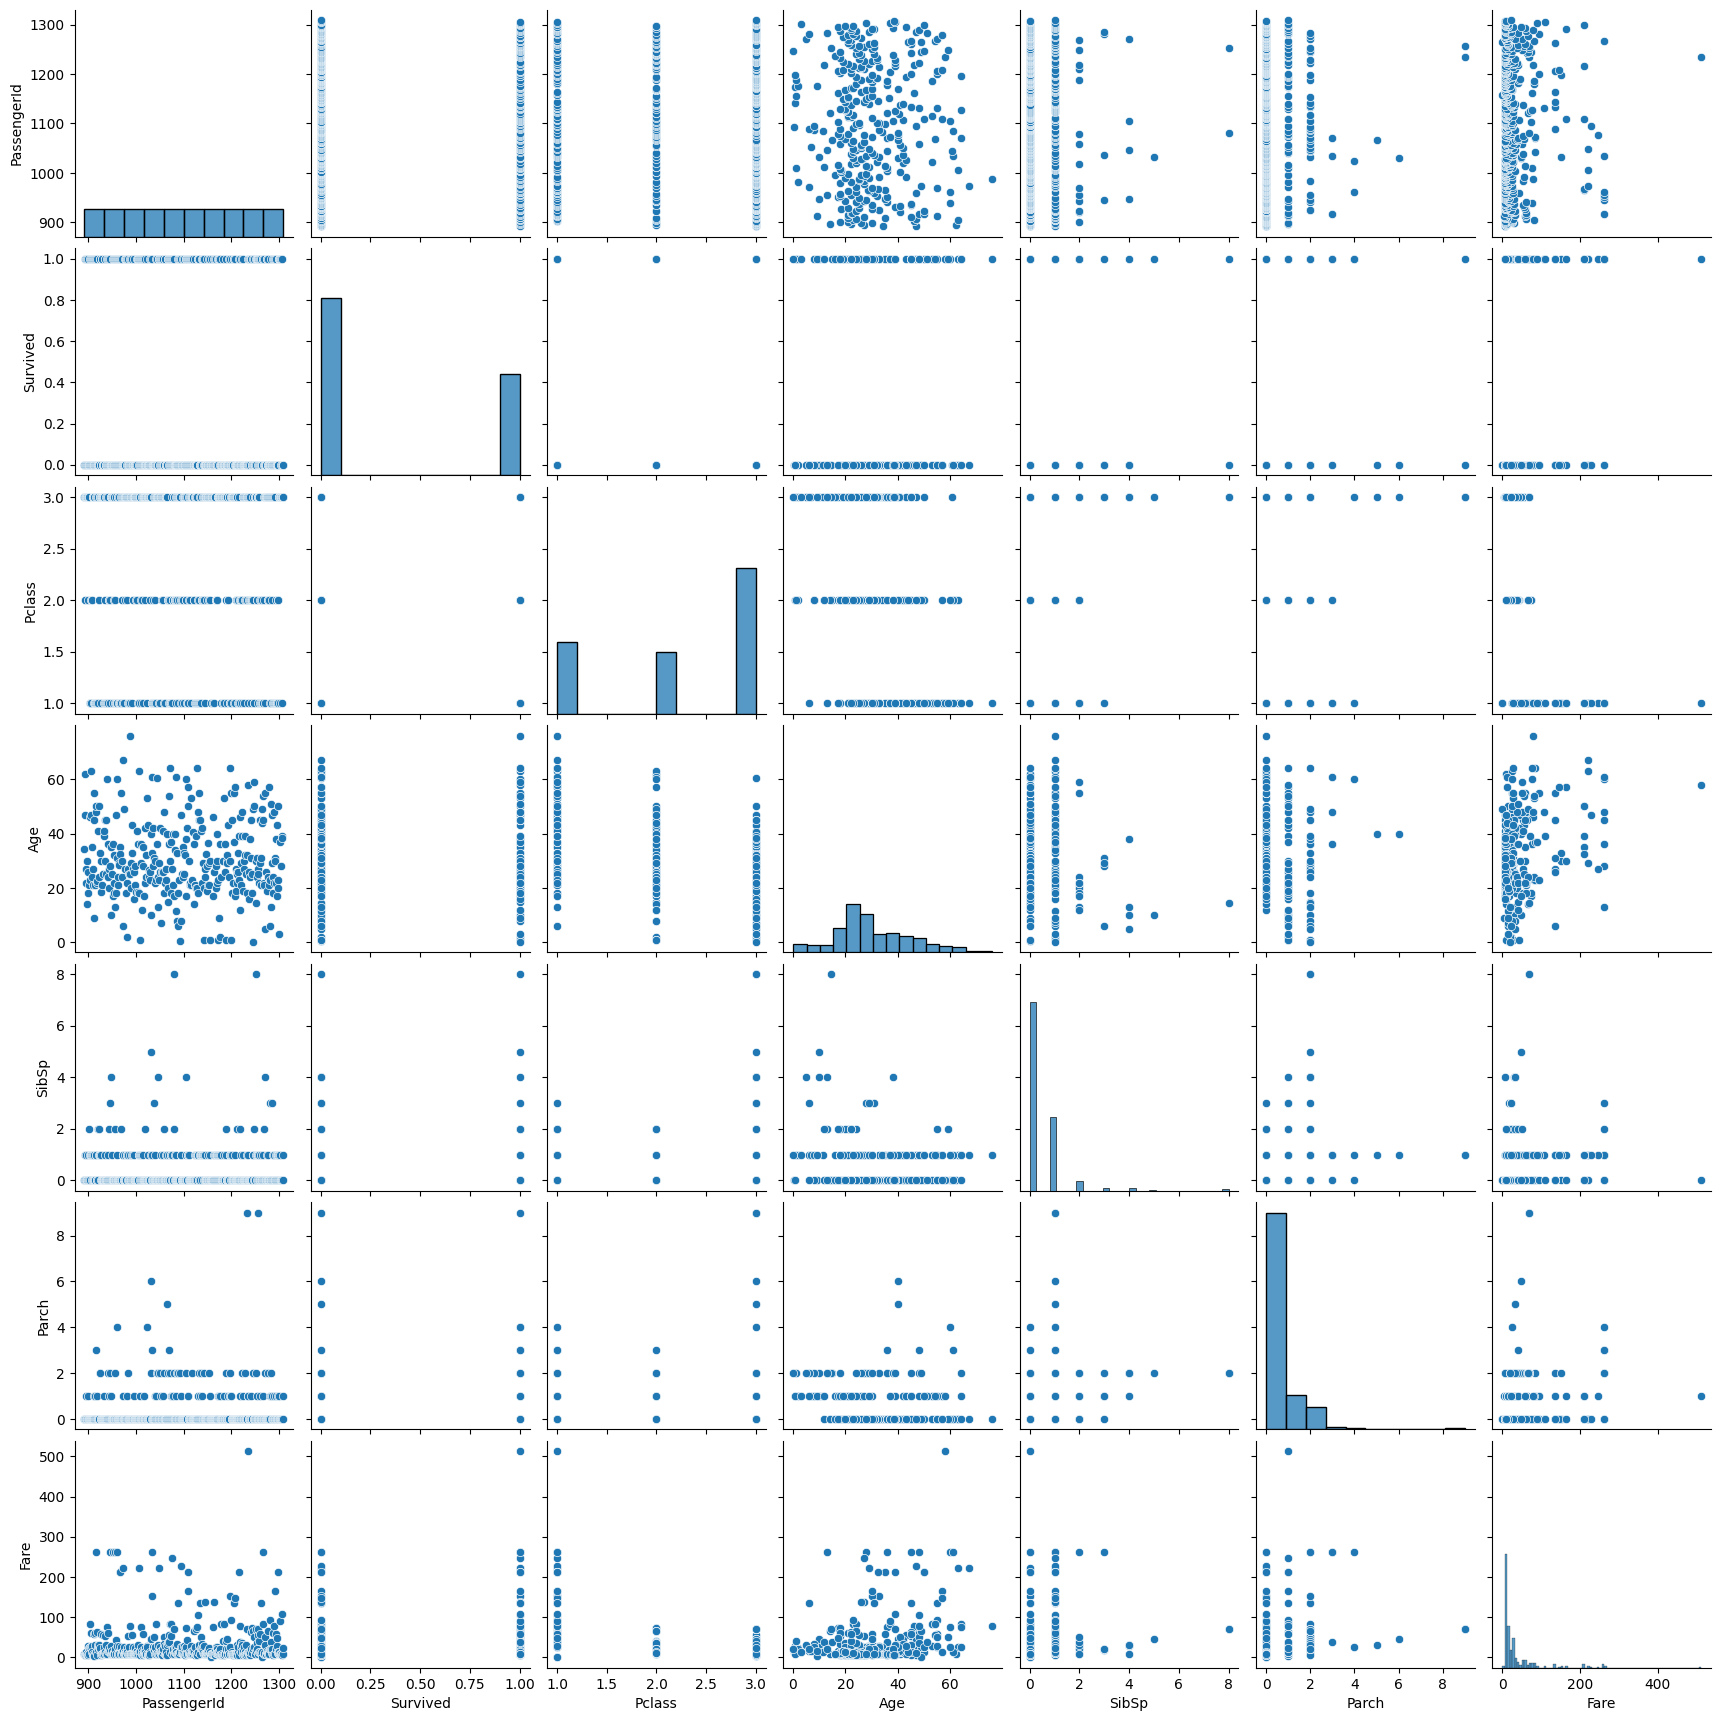

In [10]:
sns.pairplot(df)
plt.show()

### visualizing sex ratio

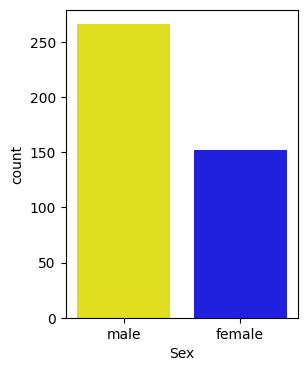

In [11]:
plt.figure(figsize=(3,4))
sns.countplot(x="Sex", data=df, palette=["YEllow","Blue"])
plt.show()

### visualizing sex ratio according to Passengers class

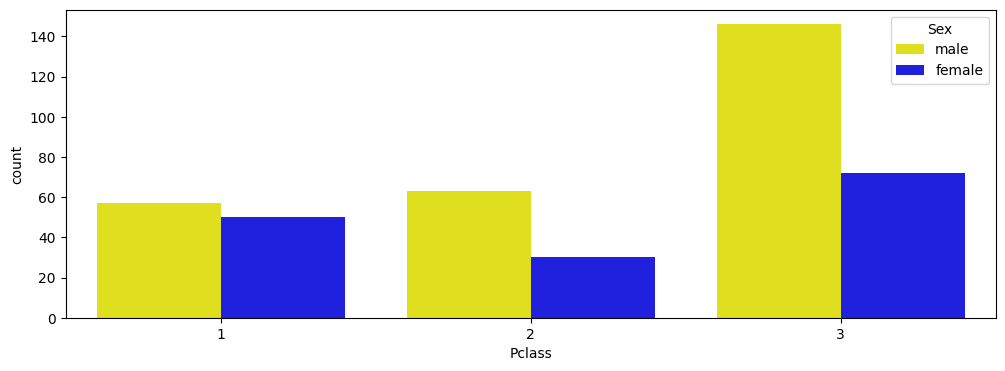

In [12]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Pclass', hue="Sex", palette=["Yellow", "blue"])
plt.show()

### Ratio of passengers according to class

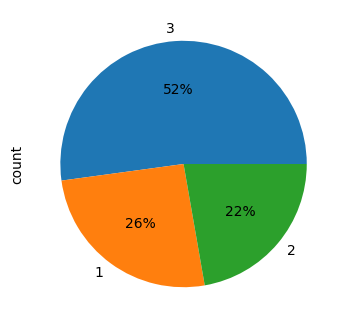

In [13]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%.0f%%', figsize=(4,4))
plt.show()

### Age distribution on the basis of Pclass

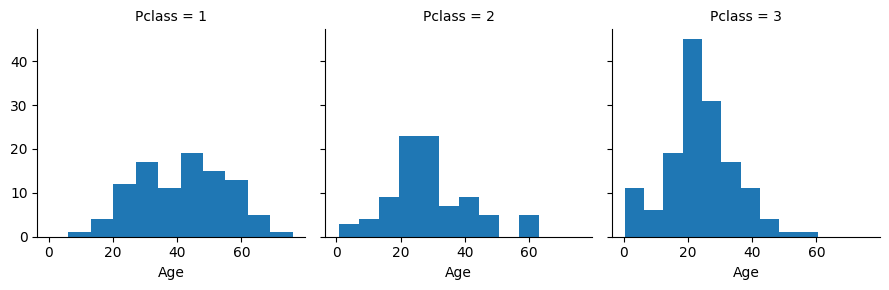

In [14]:
age_dist=sns.FacetGrid(df, col="Pclass")
age_dist=age_dist.map(plt.hist, "Age")

### Visualizing survivel of passengers

In [15]:
print("Not Survived", round(df["Survived"].value_counts()[0]/len(df)*100,3),"% of total Passengers")
print("Survived", round(df["Survived"].value_counts()[1]/len(df)*100,3),"% of total Passengers")

Not Survived 63.636 % of total Passengers
Survived 36.364 % of total Passengers


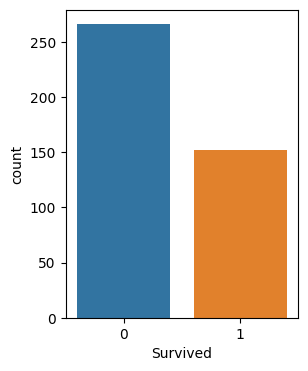

In [16]:
plt.figure(figsize=(3,4))
sns.countplot(x="Survived", data=df)
plt.show()

### Survived people according to class

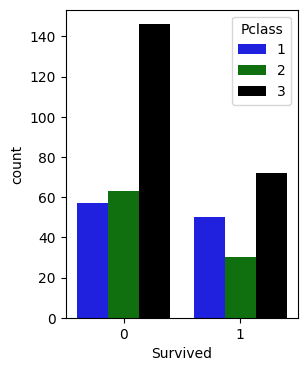

In [17]:
plt.figure(figsize=(3,4))
sns.countplot(data=df, x='Survived', hue='Pclass', palette=["Blue","Green","Black"])
plt.show()

### Survivel rate according to their Embarked point

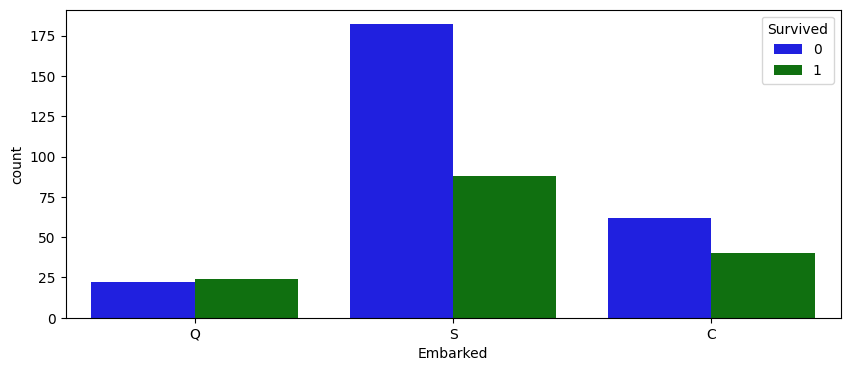

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x="Embarked", hue="Survived", palette=["Blue","Green"])
plt.show()

## Visualizing Age and Fare distribution

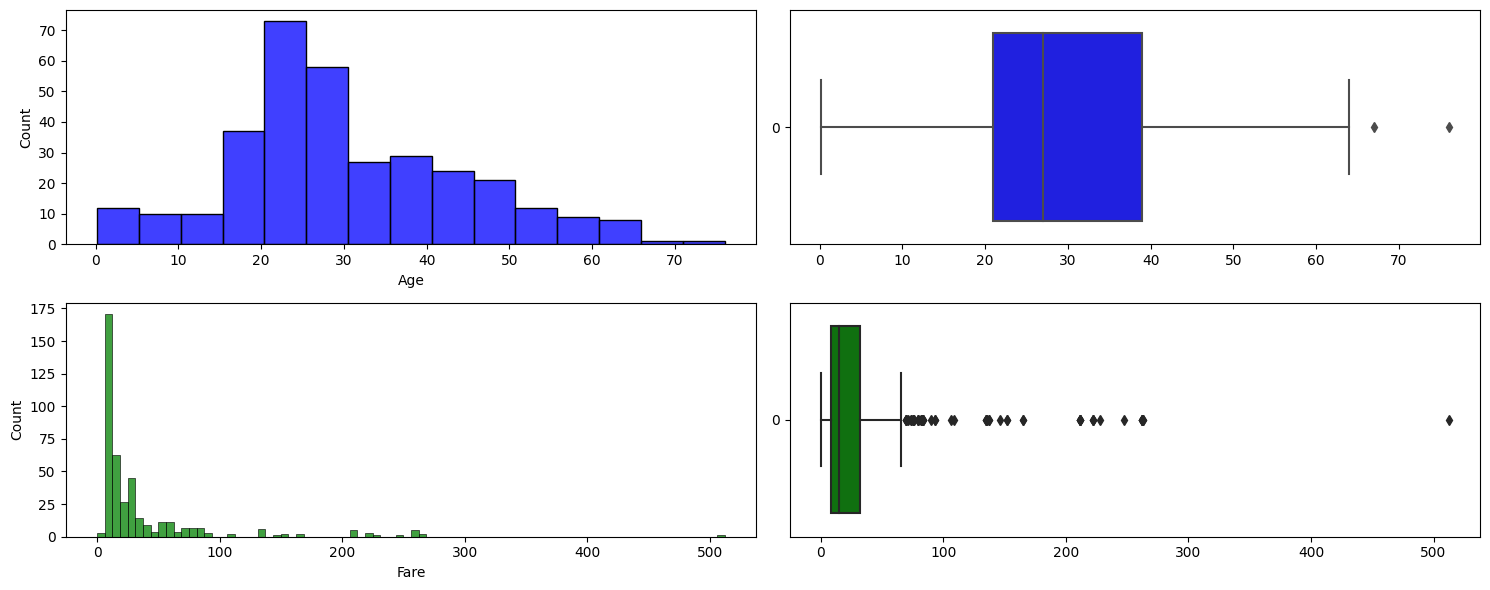

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.histplot(df["Age"], color="Blue")
plt.subplot(2,2,2)
sns.boxplot( df["Age"], color="Blue", orient="h")

plt.subplot(2,2,3)
sns.histplot(df["Fare"], color="Green")
plt.subplot(2,2,4)
sns.boxplot( df["Fare"], color="Green", orient="h")

plt.tight_layout()
plt.show()

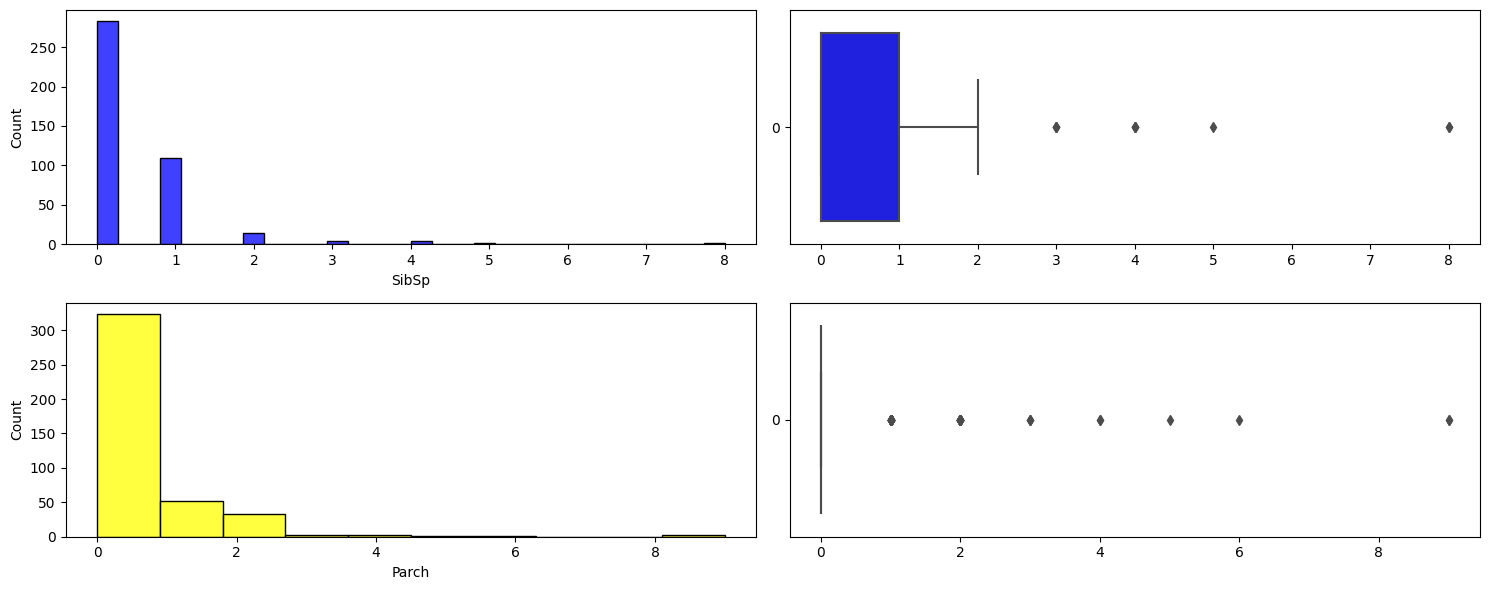

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.histplot(df["SibSp"], color="Blue")
plt.subplot(2,2,2)
sns.boxplot( df["SibSp"], color="Blue", orient="h")

plt.subplot(2,2,3)
sns.histplot(df["Parch"], color="Yellow")
plt.subplot(2,2,4)
sns.boxplot( df["Parch"], color="Yellow", orient="h")

plt.tight_layout()
plt.show()

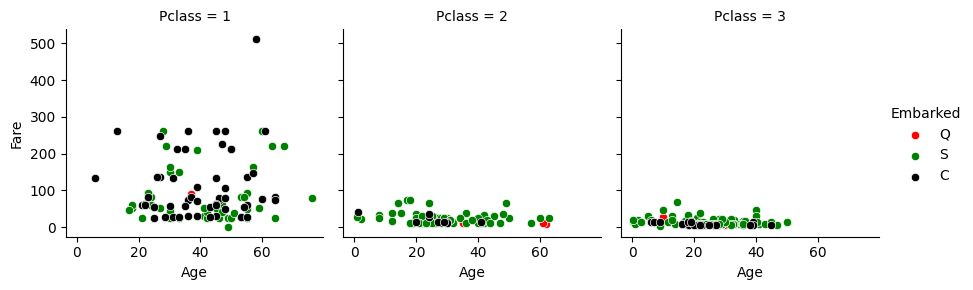

In [21]:
Boarding_station=sns.FacetGrid(df, col="Pclass", hue="Embarked", palette=["Red","Green", "Black"])
Boarding_station.map_dataframe(sns.scatterplot, x="Age", y="Fare")
Boarding_station.add_legend()
plt.show()

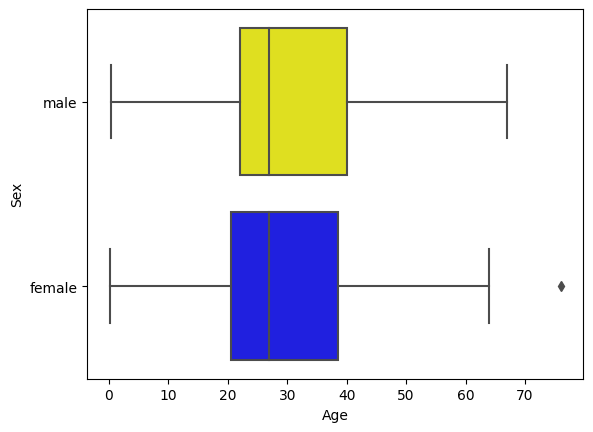

In [22]:
sns.boxplot(x="Age", y="Sex", data=df, palette=["Yellow","Blue"])
plt.show()

### missing value visualiztion

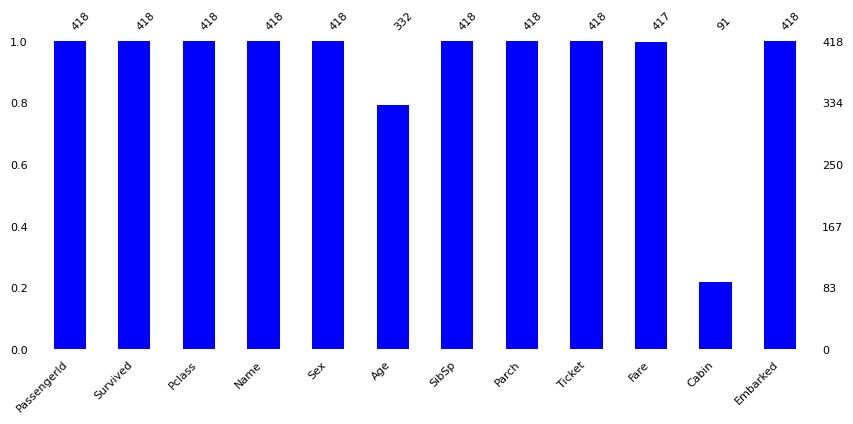

In [23]:
import missingno
missingno.bar(df, color="blue", figsize=(10,4), fontsize=8);

### Removing null values

In [24]:
df["Age"]= df["Age"].fillna(df["Age"].mean())
df["Fare"]= df["Fare"].fillna(df["Fare"].mean())
df["Cabin"]=df["Cabin"].fillna(0)

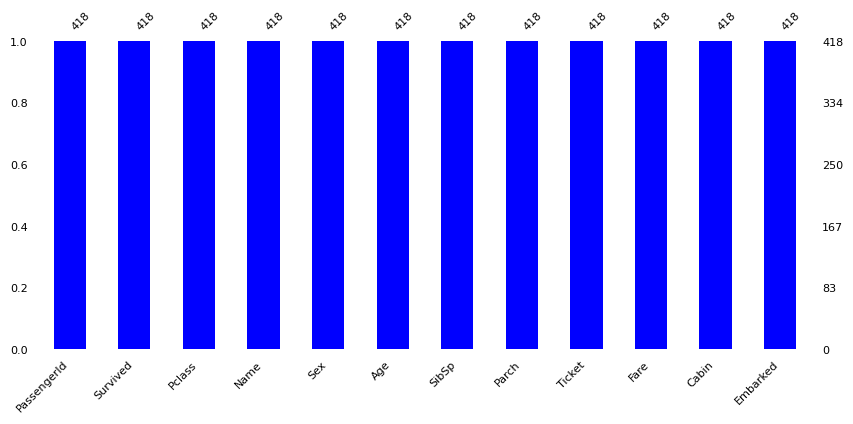

In [25]:
import missingno
missingno.bar(df, color="blue", figsize=(10,4), fontsize=8);

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Removing unnessecary Columns

In [27]:
df= df.drop(['Name', 'Cabin','Ticket'], axis=1)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


### Conerting categorial values to numerical values

In [29]:
df["Sex"]=pd.factorize(df.Sex)[0]
df["Embarked"]=pd.factorize(df.Embarked)[0]

In [30]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,0
1,893,1,3,1,47.0,1,0,7.0000,1
2,894,0,2,0,62.0,0,0,9.6875,0
3,895,0,3,0,27.0,0,0,8.6625,1
4,896,1,3,1,22.0,1,1,12.2875,1


In [31]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,1305,0,3,0,30.27259,0,0,8.0500,1
414,1306,1,1,1,39.00000,0,0,108.9000,2
415,1307,0,3,0,38.50000,0,0,7.2500,1
416,1308,0,3,0,30.27259,0,0,8.0500,1
417,1309,0,3,0,30.27259,1,1,22.3583,2


In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Spliting into Independent and dependent variable

In [33]:
x= df.drop(["Survived"], axis=1)
y= df["Survived"]

### Spliting data set into training and testing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=23)

In [36]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
334,1226,3,0,27.00000,0,0,7.8958,1
43,935,2,1,30.00000,0,0,13.0000,1
8,900,3,1,18.00000,0,0,7.2292,2
45,937,3,0,25.00000,0,0,7.9250,1
323,1215,1,0,33.00000,0,0,26.5500,1
...,...,...,...,...,...,...,...,...
237,1129,3,0,20.00000,0,0,7.2250,2
31,923,2,0,24.00000,2,0,31.5000,1
40,932,3,0,39.00000,0,1,13.4167,2
230,1122,2,0,14.00000,0,0,65.0000,1


In [37]:
y_train

334    0
43     1
8      1
45     0
323    0
      ..
237    0
31     0
40     0
230    0
83     0
Name: Survived, Length: 334, dtype: int64

In [38]:
x_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
321,1213,3,0,25.00000,0,0,7.2292,2
274,1166,3,0,30.27259,0,0,7.2250,2
248,1140,2,1,29.00000,1,0,26.0000,1
94,986,1,0,25.00000,0,0,26.0000,2
175,1067,2,1,15.00000,0,2,39.0000,1
...,...,...,...,...,...,...,...,...
300,1192,3,0,32.00000,0,0,7.7750,1
351,1243,2,0,25.00000,0,0,10.5000,1
213,1105,2,1,60.00000,1,0,26.0000,1
273,1165,3,1,30.27259,1,0,15.5000,0


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

### Model implemetation

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [42]:
rf_y_predict=rf.predict(x_test)

In [43]:
print('Model accuracy_score : {0:0.4f}' . format(accuracy_score(y_test, rf_y_predict)))

Model accuracy_score : 1.0000


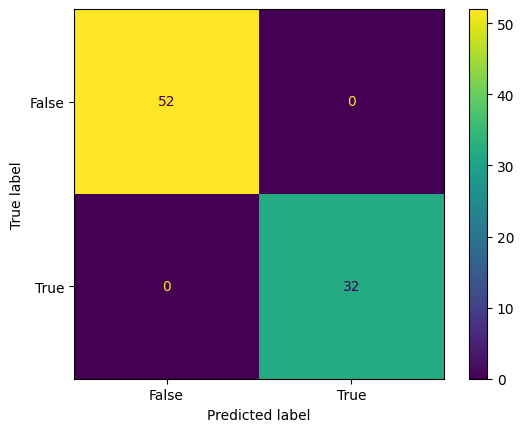

In [44]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()